## Exploratory Data Analysis

In [46]:
# Importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
pd.set_option("display.max_rows", None, "display.max_columns", None, "display.width", None)

# Importing dataset
data = pd.read_csv('1996-2016 Aus ERP..csv')
data.head()


,Sex,Age,Country.of.birth,Region,Time,Population
0,Males,0 - 4,Australia,New South Wales,1996,217870
1,Males,0 - 4,Australia,New South Wales,2001,216620
2,Males,0 - 4,Australia,New South Wales,2006,213520
3,Males,0 - 4,Australia,New South Wales,2011,233550
4,Males,0 - 4,Australia,New South Wales,2016,246710


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326656 entries, 0 to 326655
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Sex               326656 non-null  object
 1   Age               326656 non-null  object
 2   Country.of.birth  326656 non-null  object
 3   Region            326656 non-null  object
 4   Time              326656 non-null  int64 
 5   Population        326656 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 15.0+ MB


### Initial evaluation:
    The dataset contains 6 features in total. 
       - 5 categorial variables: Time, Sex, Age, Country of Birth, Region
       - 1 numerical variable: Population. 
    There is no null values found. 

## Analysing numerical variable

In [12]:
data.Population.describe()

count    326656.000000
mean        319.778881
std        5290.432716
min           0.000000
25%           0.000000
50%           0.000000
75%          10.000000
max      246710.000000
Name: Population, dtype: float64

C:\Users\fresh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Population', ylabel='Density'>

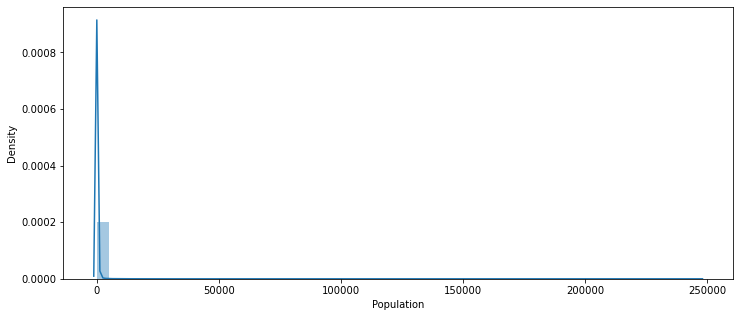

In [14]:
plt.figure(figsize=(12,5))
sns.distplot(data['Population'], hist=True, label = 'Population')

The Population distribution is heavily right-skewed. Meaning that the huge percentage of population are somewhere between 0 and 7000, and a very small percentage of population is higher than that, causing the data to be skewed. 

Looking at the statistical analysis, only 25% of the population entries is higher than 10.

## Analysing categorical variables

### Sex, Time

<AxesSubplot:xlabel='Time', ylabel='Population'>

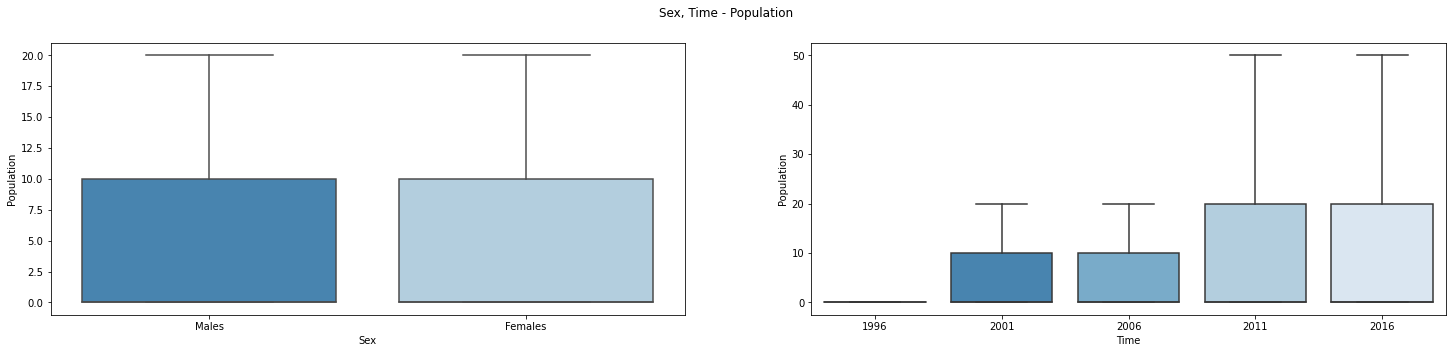

In [20]:
# Removing outliers
fig, axes = plt.subplots(1, 2, figsize=(25, 5))
fig.suptitle('Sex, Time - Population')
sns.boxplot(ax=axes[0], data=data, x='Sex', y='Population', palette = "Blues_r", showfliers = False)
sns.boxplot(ax=axes[1], data=data, x='Time', y='Population', palette = "Blues_r", showfliers = False)

In [21]:
data.Population[data.Time == 1996].describe()

count     65536.000000
mean        278.089752
std        4845.388929
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      217870.000000
Name: Population, dtype: float64

In [25]:
data.Population[data.Time == 1996].sum()

18224890

Key findings
   1. The popuplation seems to distribute equally between 2 sexes
   2. The more recent the data is, the larger the population range is.
   3. The population by Time in 1996 is mostly 0 (at least 75%). However, the total population in 1996 is close to the national report (18,211,845), we can still consider trusting the population data in 1996 for the purpose of the report. Further research is suggested if possible. 

### Age

<AxesSubplot:xlabel='Age', ylabel='Population'>

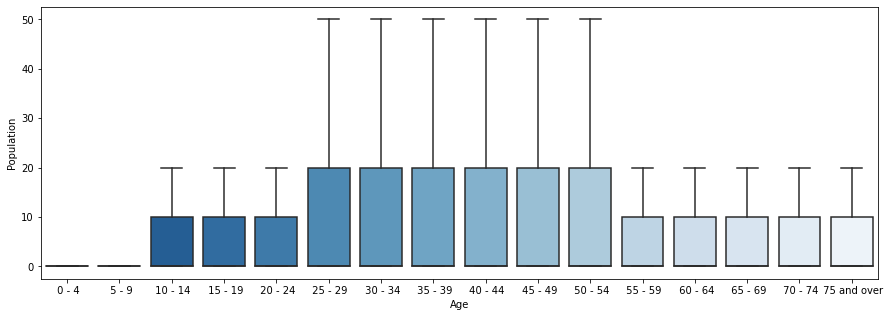

In [36]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data, x='Age', y='Population', palette = "Blues_r", showfliers = False)

In [59]:
# Descriptive statistics for 0-4 age group
data.Population[data.Age == " 0 - 4"].describe()

count     20416.000000
mean        337.408405
std        6995.469695
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      246710.000000
Name: Population, dtype: float64

Age feature contains no null values. After removing all outliers, we can see population come mostly from adults (25 to 54 years old). Some age groups that stay next to each other show the same range in population. Therefore, we might consider to group them into the same group. For example: 0-9 (Gen Alpha) or 10-24 (Gen Z)

### Region

<AxesSubplot:xlabel='Region', ylabel='Population'>

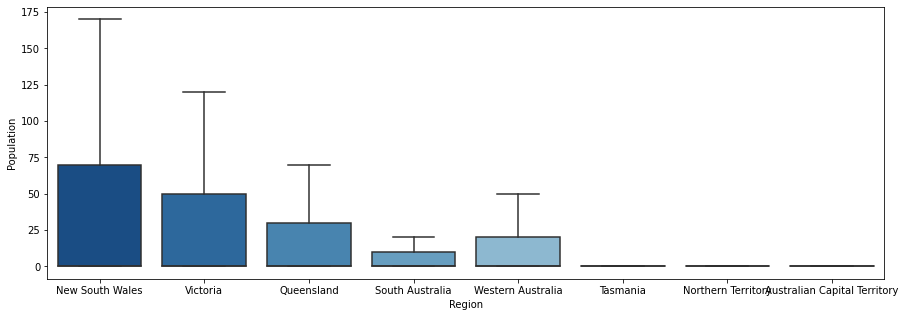

In [61]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data, x='Region', y='Population', palette = "Blues_r", showfliers = False)

The region feature contains correctly 8 regions of Australia and no null values. Population varies greatly in different regions. 

### Country of Birth

In [52]:
data1=data[['Country.of.birth', 'Population']]

In [54]:
data1.groupby('Country.of.birth').Population.sum()

Country.of.birth
Adelie Land (France)                                     0
Afghanistan                                         122510
Aland Islands                                            0
Albania                                              10330
Algeria                                               5340
Andorra                                                 10
Angola                                                1700
Anguilla                                                10
Antigua and Barbuda                                      0
Argentina                                            67500
Argentinian Antarctic Territory                          0
Armenia                                               4640
Aruba                                                   30
Australia                                         77817590
Australian Antarctic Territory                           0
Australian External Territories, nec                     0
Austria                                

In [64]:
data1['Country.of.birth'].nunique()

256

Country of birth feature contains 256 unique values. Some countries do not have any people stay in Australia. 